In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from scipy.optimize import curve_fit
%matplotlib inline


**Python/Numpy basics**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Q2
df = pd.read_csv("/content/drive/MyDrive/dataset/wheetseeds.csv")
x = df.loc[:,["Area","Perimeter", "Class"]]
y = x.to_numpy()

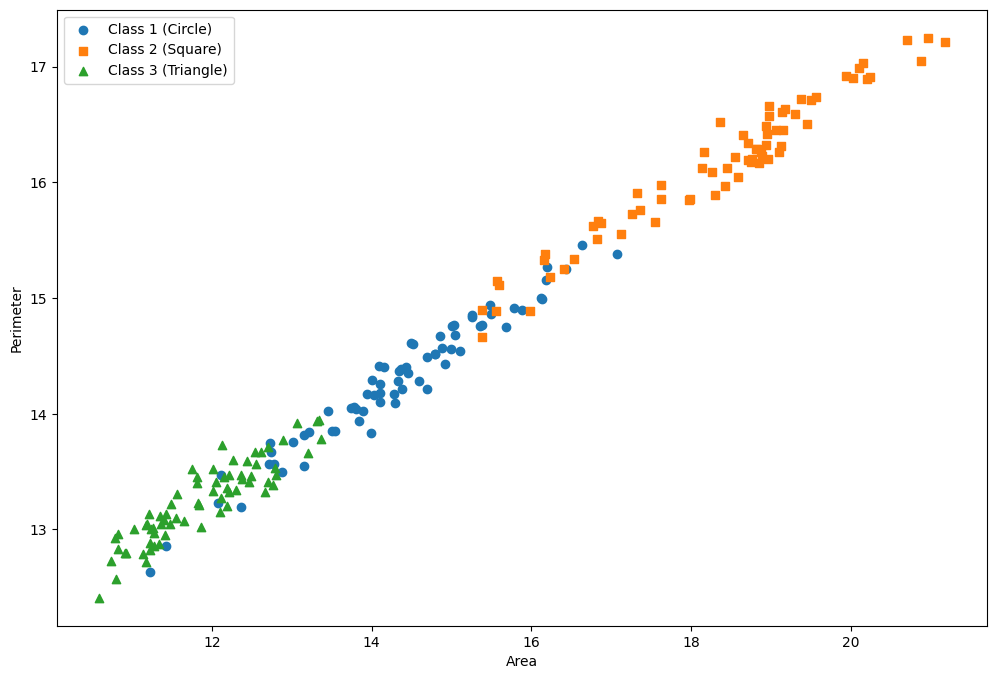

In [ ]:
# Q3
# Separate data by class
class1 = x.loc[x.Class == 1,["Area","Perimeter"]].to_numpy()
class2 = x.loc[x.Class == 2,["Area","Perimeter"]].to_numpy()
class3 = x.loc[x.Class == 3,["Area","Perimeter"]].to_numpy()

# Create a 3D plot
fig = plt.figure(figsize = (12,8))
ax = fig.subplots()

# Plot data points with different shapes
ax.scatter(*zip(*class1), marker='o', label='Class 1 (Circle)')
ax.scatter(*zip(*class2), marker='s', label='Class 2 (Square)')
ax.scatter(*zip(*class3), marker='^', label='Class 3 (Triangle)')

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

[14.33442857 14.29428571]
[18.33428571 16.13571429]
[11.87385714 13.24785714]


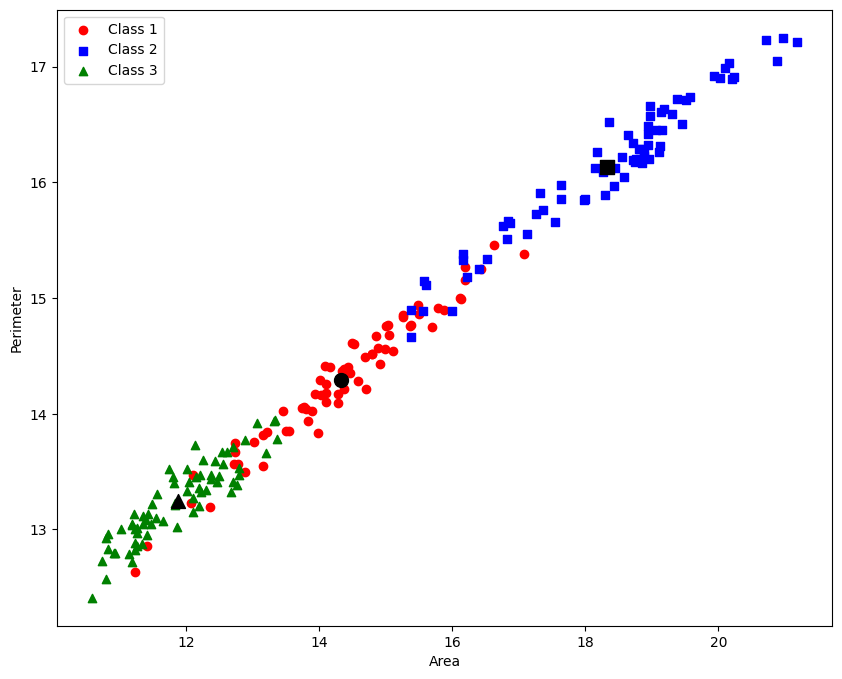

In [ ]:
# Q4
# Separate data by class
class1 = x.loc[x.Class == 1,["Area","Perimeter"]].to_numpy()
class2 = x.loc[x.Class == 2,["Area","Perimeter"]].to_numpy()
class3 = x.loc[x.Class == 3,["Area","Perimeter"]].to_numpy()

class1_mean = np.mean(class1, axis=0)
class2_mean = np.mean(class2, axis=0)
class3_mean = np.mean(class3, axis=0)

print(class1_mean)
print(class2_mean)
print(class3_mean)


# # Create a 3D plot
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

# Plot data points with different shapes
ax.scatter(class1[:, 0], class1[:, 1], marker='o', label='Class 1', color="r")
ax.scatter(class2[:, 0], class2[:, 1], marker='s', label='Class 2', color="b")
ax.scatter(class3[:, 0], class3[:, 1], marker='^', label='Class 3', color="g")

# mean
ax.scatter(class1_mean[0], class1_mean[1], s=100, marker='o', color='black')
ax.scatter(class2_mean[0], class2_mean[1], s=100, marker='s', color='black')
ax.scatter(class3_mean[0], class3_mean[1], s=100, marker='^', color='black')

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

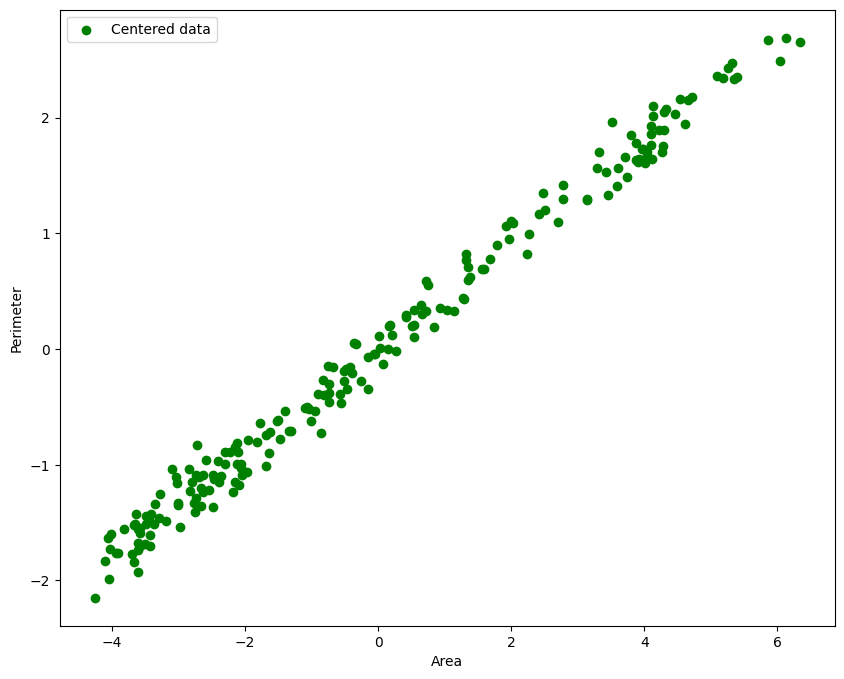

In [ ]:
# Q5
# Data matrix with Area and Perimeter dimension
D = df.loc[:,['Area', 'Perimeter']].to_numpy()

# Centered data matrix
centered_area = D[:, 0] - np.mean(D[:, 0])
centered_perimeter = D[:, 1] - np.mean(D[:, 1])


# for ploting graph
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

# plot centered data set
ax.scatter(centered_area, centered_perimeter, marker='o', label='Centered data', color="g")

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

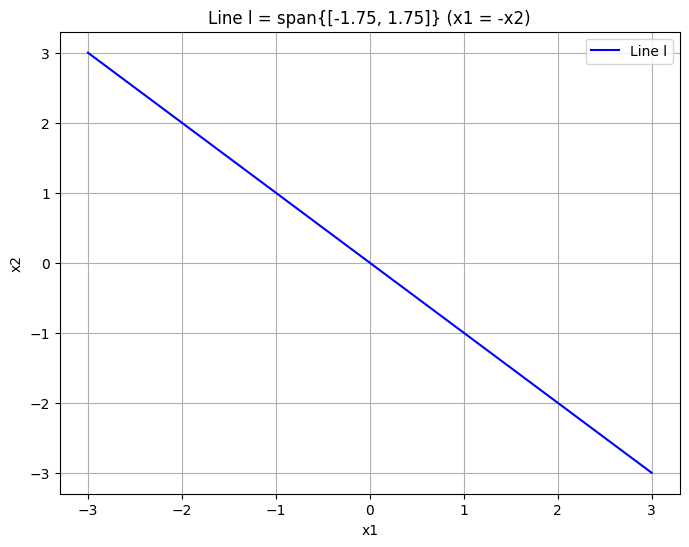

In [ ]:
# Q6
x1 = np.linspace(-3, 3, 100)  # Adjust the range and number of points as needed

# Calculate x2 using the equation x1 = -x2
x2 = -x1

# Create a plot
plt.figure(figsize=(8, 6))

# Plot the line l
plt.plot(x1, x2, label='Line l', color='blue')

# Add labels and a title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Line l = span{[-1.75, 1.75]} (x1 = -x2)')

# Show the plot with a legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

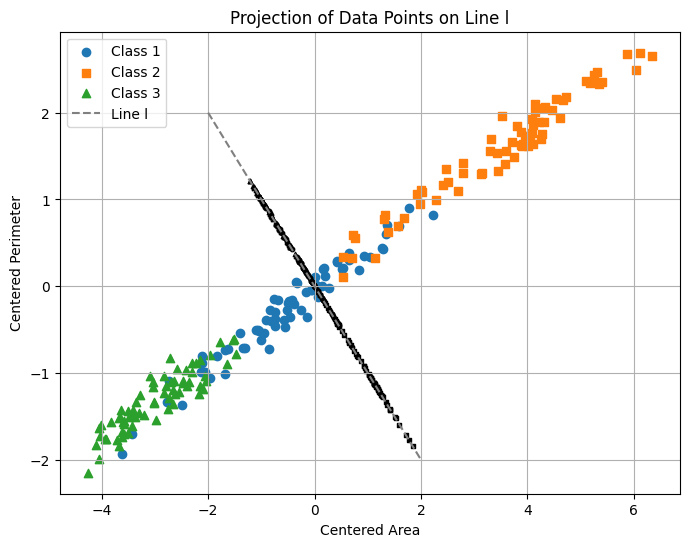

In [ ]:
#Q-7
centered_area = D[:, 0] - np.mean(D[:, 0])
centered_perimeter = D[:, 1] - np.mean(D[:, 1])

# Define the line vector [-1.75 1.75]
line_vector = np.array([-1.75, 1.75])

# Calculate the projection of each data point onto the line
projections = np.dot(np.column_stack((centered_area, centered_perimeter)), line_vector)

# Create an empty list to store the projection vectors
projection_list = []

# Calculate the projection for each data point
for i in range(len(projections)):
    projection = (projections[i] / np.dot(line_vector, line_vector)) * line_vector
    projection_list.append(projection)

# Convert the list of projection vectors to a NumPy array
projections = np.array(projection_list)

# Create a new plot for centered data
plt.figure(figsize=(8, 6))

# Plot centered data points

class_to_shape = {
    1: 'o',  # Circle
    2: 's',  # Square
    3: '^',  # Triangle
}

for class_label, shape in class_to_shape.items():
    class_indices = (y[:, -1] == class_label)
    plt.scatter(centered_area[class_indices], centered_perimeter[class_indices], marker=shape, label=f'Class {class_label}')

    # Plot the projected points on the line with the same shape but smaller size
    class_projections = projections[class_indices]
    for i in range(len(class_projections)):
        projection = class_projections[i]
        plt.scatter(projection[0], projection[1], marker=shape, s=10, color='black')

# Plot the line l: x1 = -x2
plt.plot([-2, 2], [2, -2], color='gray', linestyle='--', label='Line l')

# Add labels and a title
plt.xlabel('Centered Area')
plt.ylabel('Centered Perimeter')
plt.title('Projection of Data Points on Line l')

# Show the plot with legend
plt.legend()
plt.grid(True)
plt.show()

**In 3D:**


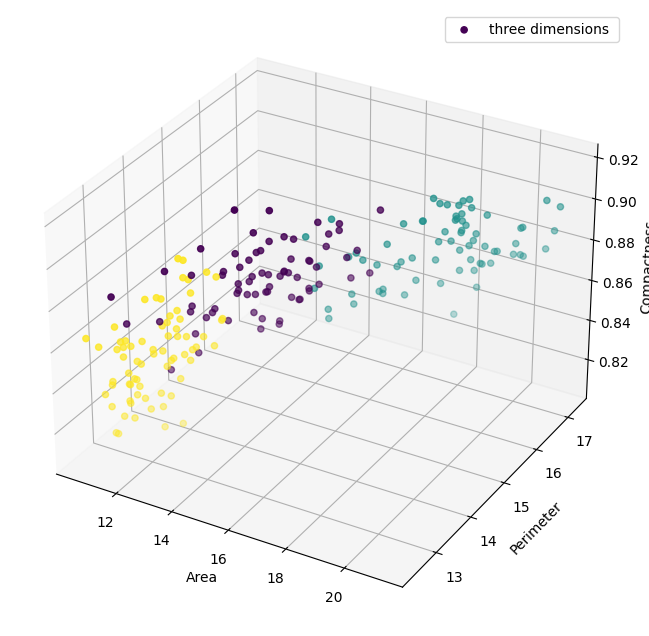

In [ ]:
# Q1
# read data for 3 dimension
x1 = df.loc[:,["Area","Perimeter","Compactness","Class"]]
y1 = x1.to_numpy()

area = df['Area']
perimeter = df['Perimeter']
compactness = df['Compactness']

# Create a 3D plot
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection='3d')

# Plot data points with different shapes
ax.scatter(area, perimeter, compactness, c=df['Class'], marker='o', label='three dimensions ')

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')

ax.legend()
plt.show()

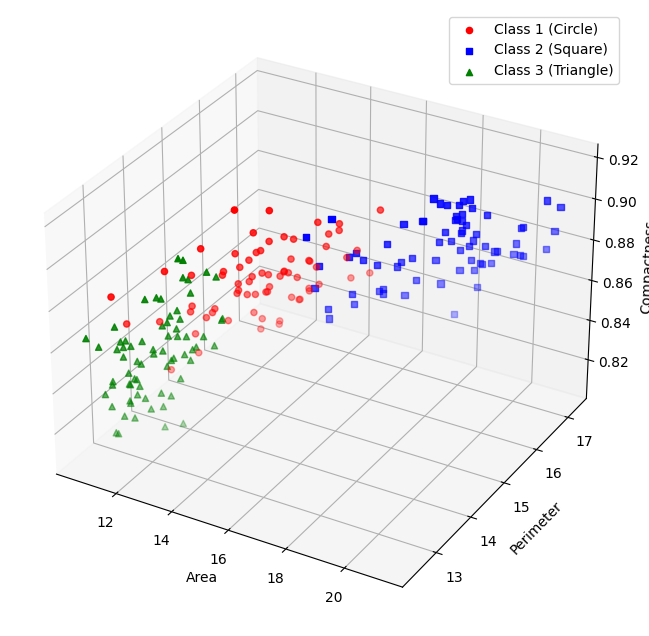

In [ ]:
# Q2
# Separate data by class
class1 = x1.loc[x1.Class == 1,["Area","Perimeter","Compactness"]].to_numpy()
class2 = x1.loc[x1.Class == 2,["Area","Perimeter","Compactness"]].to_numpy()
class3 = x1.loc[x1.Class == 3,["Area","Perimeter","Compactness"]].to_numpy()

# Create a 3D plot
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(projection='3d')

# Plot data points with different shapes
ax.scatter(*zip(*class1), marker='o', label='Class 1 (Circle)', color = "r")
ax.scatter(*zip(*class2), marker='s', label='Class 2 (Square)', color = "b")
ax.scatter(*zip(*class3), marker='^', label='Class 3 (Triangle)', color = "g")

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')

ax.legend()
plt.show()

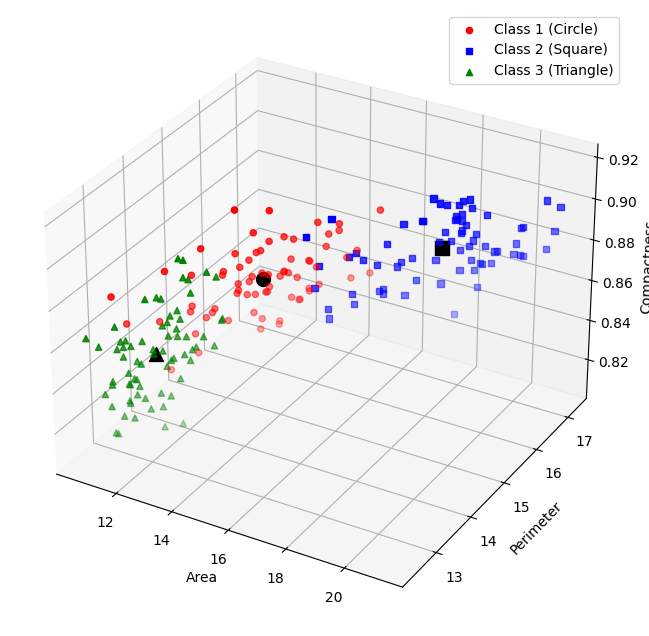

In [ ]:
# Q3
# Separate data by class
class1 = x1.loc[x1.Class == 1,["Area","Perimeter","Compactness"]].to_numpy()
class2 = x1.loc[x1.Class == 2,["Area","Perimeter","Compactness"]].to_numpy()
class3 = x1.loc[x1.Class == 3,["Area","Perimeter","Compactness"]].to_numpy()

# mean
class1_mean = np.mean(class1, axis=0)
class2_mean = np.mean(class2, axis=0)
class3_mean = np.mean(class3, axis=0)

# Create a 3D plot
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(projection='3d')

# Plot data points with different shapes
ax.scatter(*zip(*class1), marker='o', label='Class 1 (Circle)', color = "r")
ax.scatter(*zip(*class2), marker='s', label='Class 2 (Square)', color = "b")
ax.scatter(*zip(*class3), marker='^', label='Class 3 (Triangle)', color = "g")

# plot mean
ax.scatter(class1_mean[0], class1_mean[1], class1_mean[2], s=100, marker='o', color='black')
ax.scatter(class2_mean[0], class2_mean[1], class2_mean[2], s=100, marker='s', color='black')
ax.scatter(class3_mean[0], class3_mean[1], class3_mean[2], s=100, marker='^', color='black')

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')

ax.legend()
plt.show()

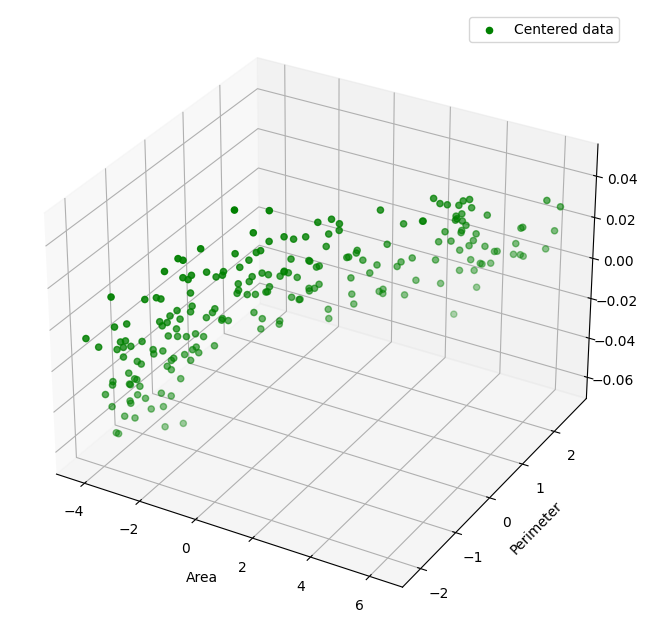

In [ ]:
# Q4
# Data matrix with Area and Perimeter dimension
D = df.loc[:,['Area', 'Perimeter','Compactness']].to_numpy()

area=df["Area"]
perimeter=df["Perimeter"]
compactness=df["Compactness"]

# Centered data matrix
centered_area = area - area.mean()
centered_perimeter = perimeter - perimeter.mean()
centered_compactness = compactness - compactness.mean()

# for ploting graph
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection='3d')

# plot centered data set
ax.scatter(centered_area, centered_perimeter, centered_compactness,marker='o', label='Centered data', color='g')

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

[1 2 3]


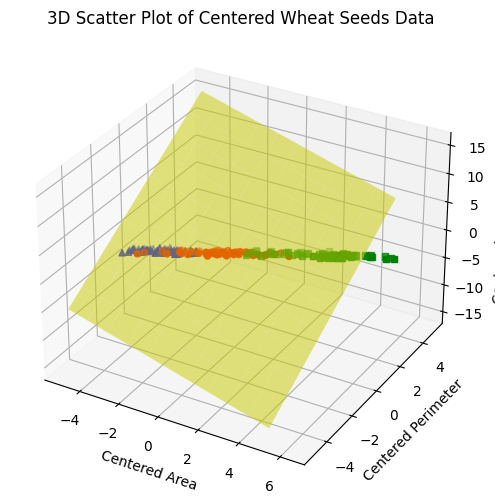

In [ ]:
# Q5
# Data matrix with Area and Perimeter dimension
area=df["Area"]
perimeter=df["Perimeter"]
compactness=df["Compactness"]
class_labels = df['Class']

# Mean Vector
centered_area = area - area.mean()
centered_perimeter = perimeter - perimeter.mean()
centered_compactness = compactness - compactness.mean()

# Create a new 3D scatter plot for centered data
fig_centered = plt.figure(figsize=(8, 6))
ax_centered = fig_centered.add_subplot(111, projection='3d')

# Define different shapes and colors for the classes
class_info = class_labels.unique()
print(class_info)
class_shapes = ['o', 's', '^']
class_colors = ['red', 'green', 'blue']

# Scatter plot in 3D for centered data with different shapes and colors for classes
for i, class_label in enumerate(class_info):
    indices = class_labels[class_labels == class_label].index
    shape = class_shapes[i]
    color = class_colors[i]
    ax_centered.scatter(centered_area[indices], centered_perimeter[indices], centered_compactness[indices],
                        c=color, marker=shape, label=f'Class {class_label}')

# Add labels and a title
ax_centered.set_xlabel('Centered Area')
ax_centered.set_ylabel('Centered Perimeter')
ax_centered.set_zlabel('Centered Compactness')
ax_centered.set_title('3D Scatter Plot of Centered Wheat Seeds Data')

# Define the plane's normal vectors
normal_vector1 = np.array([1, -2, 1])
normal_vector2 = np.array([2, 1, 0])

# Create a grid for the plane
xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))
zz = (normal_vector1[0] * xx + normal_vector1[1] * yy) / -normal_vector1[2]

# # Plot the plane
ax_centered.plot_surface(xx, yy, zz, color='yellow', alpha=0.5)

# Show the plot
plt.show()

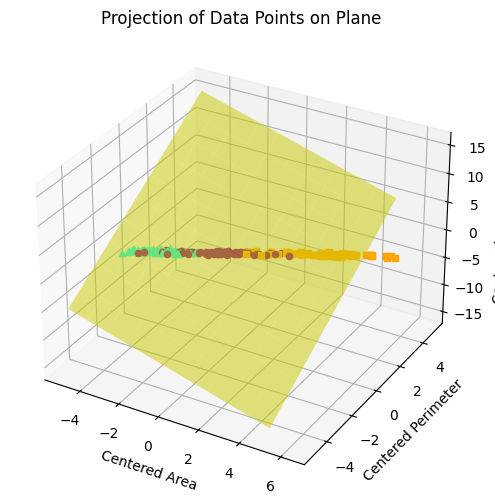

In [ ]:
#Q-6

projections = []

for i in range(len(centered_area)):
    # Calculate the projection of the centered data point onto the plane
    point = np.array([centered_area[i], centered_perimeter[i], centered_compactness[i]])

    # Calculate the projection using the dot product with the normal vectors
    projection = np.dot(point, normal_vector1) / np.linalg.norm(normal_vector1) ** 2 * normal_vector1 + np.dot(point, normal_vector2) / np.linalg.norm(normal_vector2) ** 2 * normal_vector2

    projections.append(projection)

# Create a new 3D scatter plot for centered data
fig_centered = plt.figure(figsize=(8, 6))
ax_centered = fig_centered.add_subplot(111, projection='3d')

# Define different shapes for the classes
class_info = class_labels.unique()
class_shapes = ['o', 's', '^']

# Plot the plane
ax_centered.plot_surface(xx, yy, zz, color='yellow', alpha=0.5)

# Define colors for the projected points
projection_colors = ['purple', 'orange', 'cyan']

# Plot the projected points on the plane with the same shape but smaller size
for i in range(len(projections)):
    shape = class_shapes[class_labels.iloc[i] - 1]
    color = projection_colors[class_labels.iloc[i] - 1]  # Color based on class
    label = f'Class {class_labels.iloc[i]}'  # Class label
    ax_centered.scatter(projections[i][0], projections[i][1], projections[i][2],
                        c=color, marker=shape, s=20)  # Include class label

# Add labels and a title
ax_centered.set_xlabel('Centered Area')
ax_centered.set_ylabel('Centered Perimeter')
ax_centered.set_zlabel('Centered Compactness')
ax_centered.set_title('Projection of Data Points on Plane')



# Show the plot

plt.show()

**Numeric Data Analysis**

In [ ]:
DM = df.loc[:,['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'width of kernel', 'Asymmetry coefficient', 'Length of kernel groove']].to_numpy()

# Q1
mean_vector = np.mean(DM, axis=0)

centered_data = DM - np.mean(DM, axis=0)
# Q2 _  (inner products between the columns)
covi = np.matmul(centered_data.T ,centered_data)/len(centered_data)

# using function
covi1 = np.inner(centered_data,centered_data)
# print(covi1)

# Q3 _ Outer
covo = np.outer(centered_data, centered_data)
# print(covo)


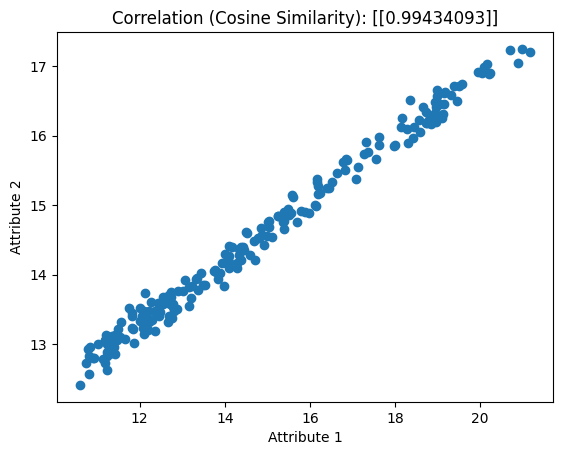

In [ ]:
#Q-4
attribute_1 = df.loc[:,['Area']].to_numpy()
attribute_2 = df.loc[:,['Perimeter']].to_numpy()

# Centering the attribute vectors
centered_attr_1 = attribute_1 - np.mean(attribute_1)
centered_attr_2 = attribute_2 - np.mean(attribute_2)

# Compute the cosine similarity
cosine_similarity = np.dot(centered_attr_1.transpose(), centered_attr_2)/(np.linalg.norm(centered_attr_1) * np.linalg.norm(centered_attr_2))

# Plot the scatter plot
plt.scatter(attribute_1, attribute_2)
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.title(f'Correlation (Cosine Similarity): {cosine_similarity}')
plt.show()